In [14]:
#vario sigma

import midas.file_reader
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import cygno as cy
import time
import pandas as pd

def baseline(f):
    noise=f[0:400]
    return np.mean(noise), np.std(noise)

def attorno_al_min(f, m, s):
        
    for i in range(len(f)):
        if (f[i]<m-13*s):
            start=max(i,400)
            break
        i+=1

    if (i==len(f)):
        return f[0:400]
    else:
        for j in range(start,len(f)):
            if (f[j]>m-13*s):
                stop=min(j,len(f))
                break
            j+=1
    
    return f[start:stop]
    

def pmt(w_slow):
    m, s = baseline(w_slow)
    #print(m, s)
    fbas = attorno_al_min(w_slow, m, s)
    
    f = np.array(fbas)
    
    for k in range(len(f)):
        f[k]=m-f[k]  
    
    #print(f)    
               
    return (np.sum(f)/(25*5))

r=[]    
R=13389

t=1
while (R<13413):
    
    if (R==t*5+Run):
        t+=1
        R+=1
        
    else:
        r.append(R)
        R+=1
    
print(r)

[13389, 13390, 13391, 13392, 13394, 13395, 13396, 13397, 13399, 13400, 13401, 13402, 13404, 13405, 13406, 13407, 13409, 13410, 13411, 13412]


In [15]:
#più run

i2=[]
i3=[]

verbose = False
outplot = True # fa i plot
run     = 13384
path    = '/jupyter-workspace/ba-storage/cygno-data/' # disco di bari

for k in range(len(r)):
    mfile = cy.open_mid(run=r[k], path=path, cloud=False, tag='LNF', verbose=verbose)

# esempio lettura informazioni dall'odb  #######
    odb = cy.get_bor_odb(mfile)
    corrected  = odb.data['Configurations']['DRS4Correction']
    channels_offsets  = odb.data['Configurations']['DigitizerOffset']
    #header_environment = odb.data['Equipment']['Environment']['Settings']['Names Input']
# esempio di retrive di variabili nell'odb
    #dslow = pd.DataFrame(columns = header_environment)
########################


# lettura equipment nel file #######
   
    for event in mfile:
        if event.header.is_midas_internal_event():
            print("Saw a special event")
            continue

        bank_names = ", ".join(b.name for b in event.banks.values())
    
        for bank_name, bank in event.banks.items():
            
            if ('DGH0' in bank_name): # PMTs wavform 
                full_header= cy.daq_dgz_full2header(event.banks['DGH0'], verbose=verbose)
                w_fast, w_slow = cy.daq_dgz_full2array(event.banks['DIG0'], full_header, verbose=verbose, corrected=corrected, ch_offset=channels_offsets)
                
                if outplot:
                    
                    i2.append(pmt(w_slow[2]))
                    i3.append(pmt(w_slow[3]))
                          
        if event.header.serial_number == 250: # si ferma dopo i primi tot eventi
            break

    print("termine run",r[k])
    k+=1
        
print("fatto")

Saw a special event
termine run 13389
Saw a special event
termine run 13390
Saw a special event
termine run 13391
Saw a special event
termine run 13392
Saw a special event
termine run 13394
Saw a special event
termine run 13395
Saw a special event
termine run 13396
Saw a special event
termine run 13397
Saw a special event
termine run 13399
Saw a special event
termine run 13400
Saw a special event
termine run 13401
Saw a special event
termine run 13402
Saw a special event
termine run 13404
Saw a special event
termine run 13405
Saw a special event
termine run 13406
Saw a special event
termine run 13407
Saw a special event
termine run 13409
Saw a special event
termine run 13410
Saw a special event
termine run 13411
Saw a special event
termine run 13412
fatto


In [17]:
#efficienza:
signal2=[]
for i in range(len(i2)):
    if (i2[i]>2):
        signal2.append(i2[i])
print("efficienza pmt1=",len(signal2)/len(i2))

signal3=[]
for i in range(len(i3)):
    if (i3[i]>2):
        signal3.append(i3[i])
print("efficienza pmt2=",len(signal3)/len(i3))




efficienza pmt1= 0.2099308610936518
efficienza pmt2= 0.22438717787554996


In [ ]:
#fit

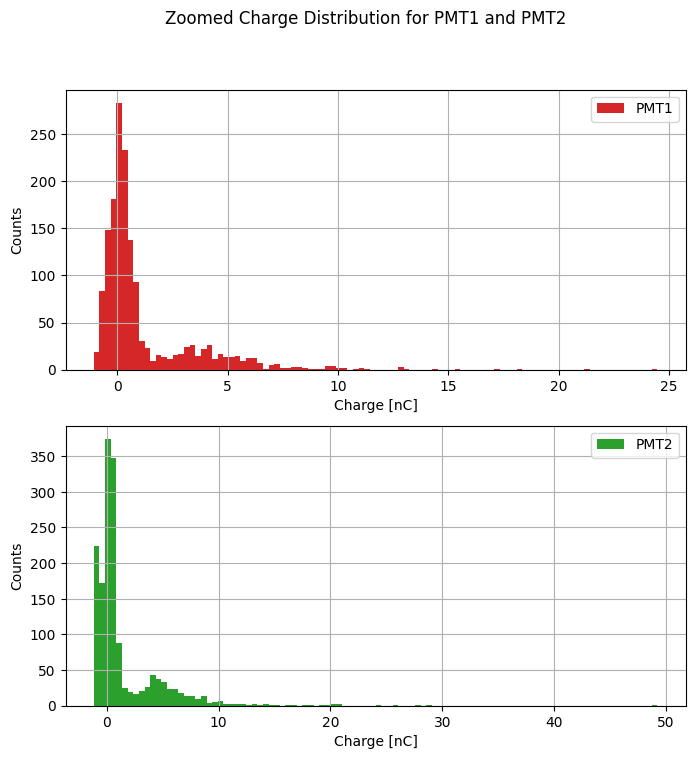

In [22]:
#più run
#più run
#print((i2))
fig,ax=plt.subplots(2,figsize=(8,8))


fig.suptitle("Zoomed Charge Distribution for PMT1 and PMT2")
for i in range(2):
    ax[i].grid()
    ax[i].set_xlabel("Charge [nC]")
    ax[i].set_ylabel("Counts")

#ax[0].set_ylim(0,80)
#ax[1].set_ylim(0,160)
  
ax[0].hist(i2,bins=100,color="tab:red",label="PMT1")
#ax[0].set_xlim(0,12)
#ax[1].set_xlim(0,16)
ax[1].hist(i3,bins=100,color="tab:green",label="PMT2")
ax[0].legend()
ax[1].legend()
plt.show()


plt.show()

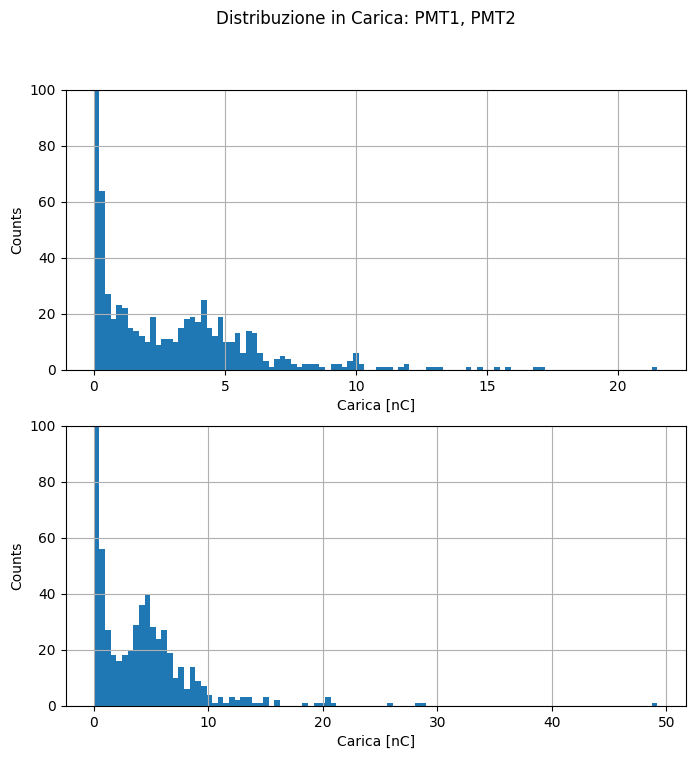

In [131]:
#più run
#print((i2))
fig,ax=plt.subplots(2,figsize=(8,8))

fig.suptitle("Distribuzione in Carica: PMT1, PMT2")

for i in range(2):
    ax[i].grid()
    ax[i].set_xlabel("Carica [nC]")
    ax[i].set_ylabel("Counts")
for i in range(2):
    #ax[i].set_xlim(0,12)
    ax[i].set_ylim(0,100)
   
ax[0].hist(i2,bins=100)
#ax[0].set_xlim(0,15)
#x[1].set_xlim(0,15)
ax[1].hist(i3,bins=100)

plt.show()

In [88]:
#una run

i2=[]
i3=[]

verbose = False
outplot = True # fa i plot
run     = 13384
path    = '/jupyter-workspace/ba-storage/cygno-data/' # disco di bari

mfile = cy.open_mid(run=run, path=path, cloud=False, tag='LNF', verbose=verbose)

# esempio lettura informazioni dall'odb  #######
odb = cy.get_bor_odb(mfile)
corrected  = odb.data['Configurations']['DRS4Correction']
channels_offsets  = odb.data['Configurations']['DigitizerOffset']
    #header_environment = odb.data['Equipment']['Environment']['Settings']['Names Input']
# esempio di retrive di variabili nell'odb
    #dslow = pd.DataFrame(columns = header_environment)
########################
# lettura equipment nel file #######
   
for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    
    for bank_name, bank in event.banks.items():
            
        if ('DGH0' in bank_name): # PMTs wavform 
            full_header= cy.daq_dgz_full2header(event.banks['DGH0'], verbose=verbose)
            w_fast, w_slow = cy.daq_dgz_full2array(event.banks['DIG0'], full_header, verbose=verbose, corrected=corrected, ch_offset=channels_offsets)
                
            if outplot:
                i2.append(pmt2(w_slow[2]))
                #i3.append(pmt(w_slow[3]))
                          
    if event.header.serial_number == 250: # si ferma dopo i primi tot eventi
        break

        
print("fatto")

Saw a special event
[13 17 20 23 27 26 27 34 32 22 18 14]
[]
[]
[12 16 27 21 29 26 21 21 19 23 19 16 26 35 26 25 36 31 25 31 50 38 36 21
 27 29 20 13 13]
[12]
[ 30  57 106 138 125 102  73  54  34  21  22  15  12]
[]
[]
[]
[]
[]
[12 29 28 41 34 21 16 14 12]
[14 12 17 20 18 21 18 17 22 22 26 21 26 31 17 29 34 26 28 27 21 16 17]
[]
[]
[16 23 26 27 27 30 27 32 29 23 24 30 36 34 38 30 26 21 17 15 18 15 13]
[]
[]
[16 15 16 14]
[]
[]
[]
[]
[23 29 35 65 80 67 63 62 54 38 38 27 18 16 12]
[]
[]
[22 29 24 14 13 15]
[21 13]
[22 35 51 29 29 22 28 29 22 27 29 31 30 36 40 30 33 17 17 13]
[]
[]
[]
[13 43 71 83 86 74 62 57 38 35 21 13]
[]
[16 19 18 18 13]
[24 37 37 26 28 27 18 17]
[22 42 51 48 52 50 48 52 49 48 39 33 26 13]
[11 22 28 32 29 22 22 18]
[]
[]
[16 17 15 13]
[28 41 54 57 92 83 85 81 43 35 35 26 23 20 14 14]
[]
[14]
[]
[ 26  51  62  84  90 100  89  72  54  36  39  41  30  27  20  20  27  29
  19  22  25  23  23  28  15  18  15  20  15  17  15  17  18  21  18  14]
[]
[]
[13 18 17 22 21 17]
[12

100


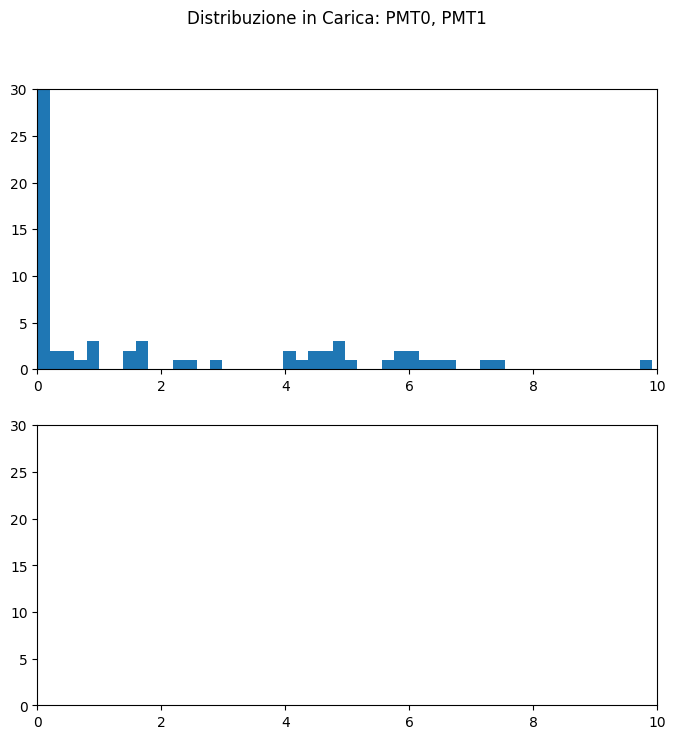

In [89]:
#una run: <5sigma >4sigma (+-5)
print(len(i2))
fig,ax=plt.subplots(2,figsize=(8,8))

fig.suptitle("Distribuzione in Carica: PMT0, PMT1")
for i in range(2):
    ax[i].set_ylim(0,30)
    ax[i].set_xlim(0,10)
ax[0].hist(i2,bins=50)
#ax[1].hist(i3,bins=50)

plt.show()